<a href="https://colab.research.google.com/github/Ahmed00002/Home-Cleaning_Service_Analysises/blob/main/Home_Cleaning_Serveice_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Step 2: Load the data

In [21]:
df = pd.read_csv("dataset_4_Health and Wellness Products.csv")
output = []
output.append("Explore Data Analysis of home cleaning srvice \n")
output.append("========================\n")
pd.

##Step 3: Explore the data


In [20]:
print(df.head())
output.append(f"First few rows: \n{df.head()}\n")

         Date            Product Region     Customer_Type  Quantity   Price  \
0  2024-08-21           Vitamins  South            Casual        16   43.29   
1  2024-09-22        Supplements  North  Health Conscious        44  266.69   
2  2024-09-08           Vitamins   East            Casual        37  166.61   
3  2024-12-03  Fitness Equipment   East            Casual        44   72.54   
4  2024-03-05  Fitness Equipment  South            Casual        17   29.54   

   Discount  Revenue  
0      0.06   651.08  
1      0.22  9152.80  
2      0.29  4376.84  
3      0.26  2361.90  
4      0.22   391.70  


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [27]:
print(df.describe())
output.append(f"Summary statistics: \n {df.describe()} \n")

         Quantity        Price     Discount       Revenue
count  1000.00000  1000.000000  1000.000000   1000.000000
mean     26.00400   147.917870     0.149750   3213.460110
std      14.25037    85.844772     0.085629   2748.020829
min       1.00000     5.170000     0.000000      8.650000
25%      14.00000    72.327500     0.070000   1018.982500
50%      26.00000   149.510000     0.150000   2428.675000
75%      39.00000   222.402500     0.220000   4850.842500
max      50.00000   299.490000     0.300000  13547.100000


##Step 4: Clean the data

In [31]:
output.append("Data cleaning results: \n")

#check for missing values
missing_values = df.isnull().sum()
print(missing_values)
output.append(f"Missing values: \n {missing_values}\n")

#fill or drop missing values
df.dropna(inplace=True)

#convert the date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

#check for dulicates
duplicates = df.duplicated().sum()
output.append(f"Numbers of Duplicates Dropped: {duplicates}\n")
df.drop_duplicates(inplace=True)

Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
dtype: int64
0


##Step 5: Analyze the data

In [41]:
#total revenue from cleaning servieces
total_revenue = df["Revenue"].sum()
output.append(f"Total Revenue: ${total_revenue}\n")
print(f"total revenue : ${total_revenue}")

total revenue : $3213460.11
9152.8


In [44]:
#average price per customer tupe wise
average_price_per_serviece = df.groupby("Customer_Type")["Price"].mean()
output.append("Acerage price per customer tupe: \n")
output.append(f"{average_price_per_serviece}\n")
print(average_price_per_serviece)

Customer_Type
Casual              146.370279
Health Conscious    149.471663
Name: Price, dtype: float64


In [45]:
#Total services provided by region
total_services_by_region = df["Region"].value_counts()
output.append(f"Total services provided by region \n")
output.append(f"{total_services_by_region} \n")
print(total_services_by_region)

Region
South    256
East     256
West     249
North    239
Name: count, dtype: int64


In [47]:
#Total revinue by region
revenueByRegion = df.groupby("Region")["Price"].sum()
output.append("Total Revenue by region: \n")
output.append(f"{revenueByRegion}\n")
print(revenueByRegion)

Region
East     37849.07
North    34104.77
South    39002.25
West     36961.78
Name: Price, dtype: float64


##Visualize the data

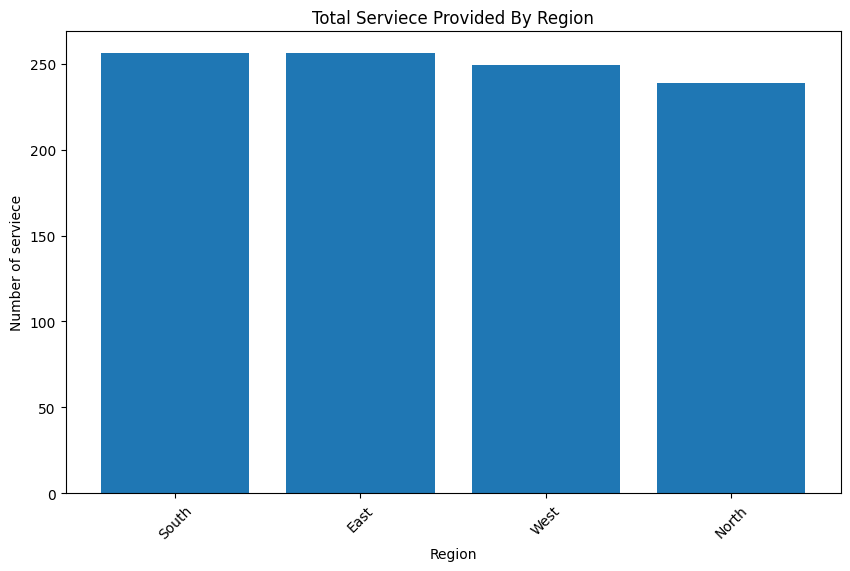

In [49]:
plt.figure(figsize=(10, 6))
plt.bar(total_services_by_region.index, total_services_by_region.values)
plt.title("Total Serviece Provided By Region")
plt.xlabel("Region")
plt.ylabel("Number of serviece")
plt.xticks(rotation=45)
plt.savefig("TotalServieceByRegion.png")
plt.show()

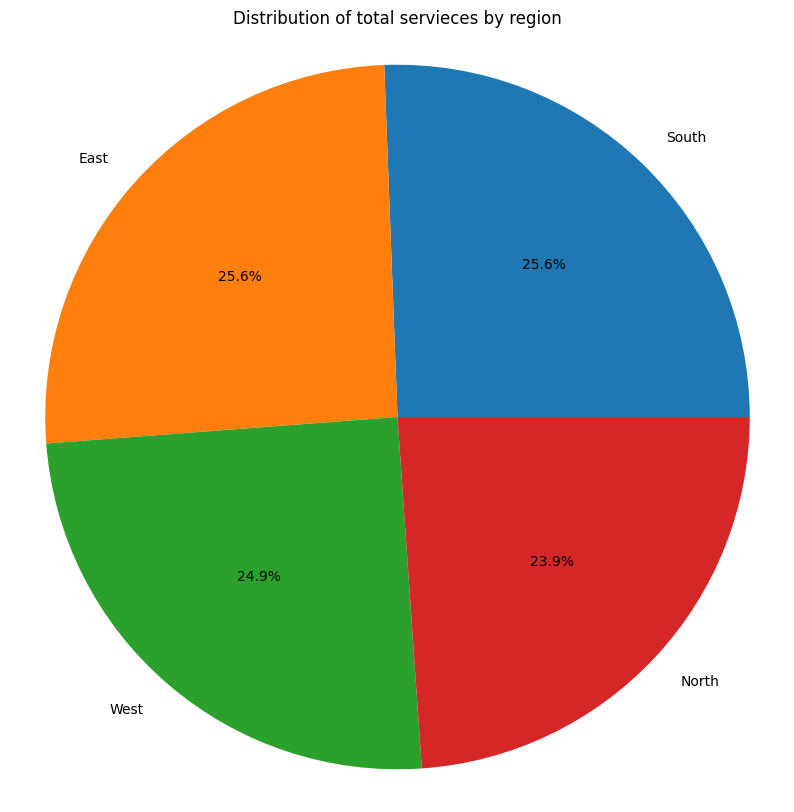

In [52]:
#pie chart for total servieces by region
plt.figure(figsize=(10,10))
plt.pie(total_services_by_region, labels = total_services_by_region.index, autopct="%1.1f%%")
plt.title("Distribution of total servieces by region")
plt.axis("Equal")
plt.savefig("ServicesProvidedByRegion.png")
plt.show()

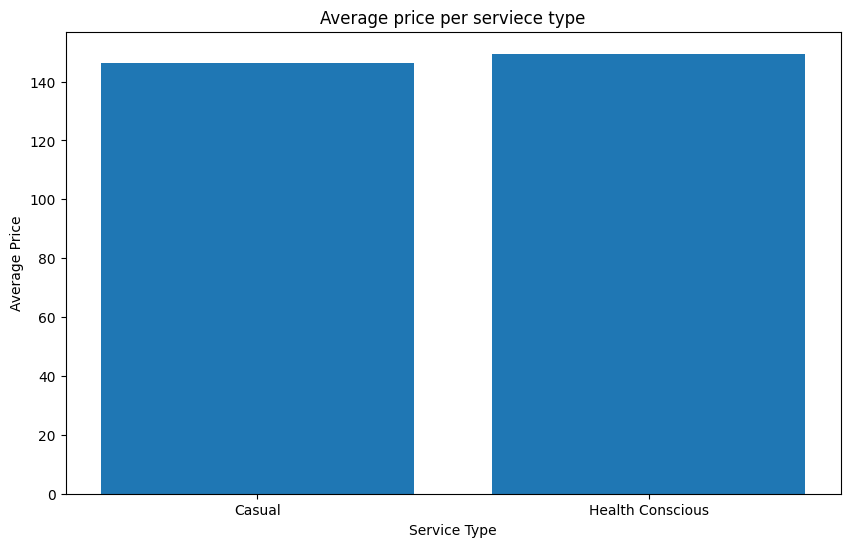

In [53]:
#bar plot of average price per service type
plt.figure(figsize=(10, 6))
plt.bar(average_price_per_serviece.index, average_price_per_serviece.values)
plt.title("Average price per serviece type")
plt.xlabel("Service Type")
plt.ylabel("Average Price")
plt.savefig("AveragePricePerServiceType.png")
plt.show()

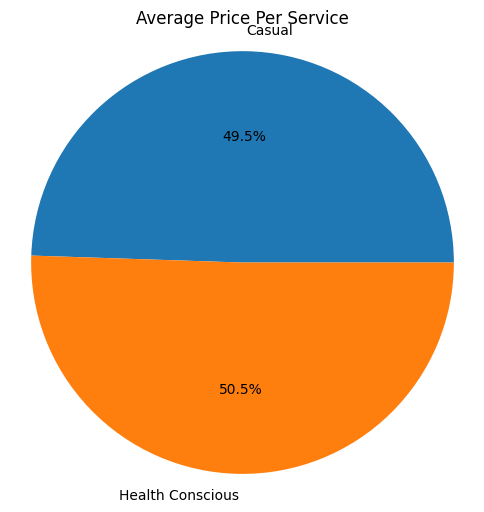

In [56]:
plt.figure(figsize=(6,6))
plt.pie(average_price_per_serviece, labels= average_price_per_serviece.index, autopct="%1.1f%%")
plt.title("Average Price Per Service")
plt.axis("Equal")
plt.savefig("AveragePricePerService.png")
plt.show()

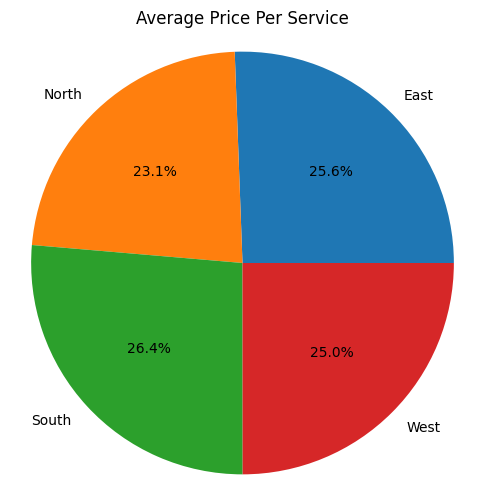

In [57]:
plt.figure(figsize=(6,6))
plt.pie(revenueByRegion, labels=revenueByRegion.index, autopct="%1.1f%%")
plt.title("Average Revinue Per Service")
plt.axis("Equal")
plt.savefig("AverageRevinuePerService.png")
plt.show()

In [58]:
with open("analysisOutput.txt", "w") as f:
  f.writelines(output)